/data1/home/prakrutp/miniconda3/envs/med_env_fixed/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 COMPREHENSIVE MODEL TESTING ON SMALL DATASET
Dataset: /data1/home/prakrutp/medical_imaging/small_data_test
Total images: ~140
Device: cuda

 Loading small dataset...
Small dataset contains 140 images
Small dataset initialized with 140 images
Small dataset initialized with 140 images

 TESTING EFFICIENTNET


/tmp/ipykernel_234509/1277439268.py:509: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(SmallDatasetConfig.efficientnet_checkpoint, map_location=Small

 EfficientNet weights loaded successfully
Testing EfficientNet on small dataset...


Testing EfficientNet: 100%|██████████| 18/18 [00:01<00:00, 10.17it/s]



EFFICIENTNET - COMPREHENSIVE TEST RESULTS

AUC Scores per class:
---------------------------------------------
Atelectasis         : 0.7375
Cardiomegaly        : 0.9323
Effusion            : 0.7325
Infiltration        : 0.6891
Mass                : 0.6817
Nodule              : 0.8773
Pneumonia           : 0.7948
Pneumothorax        : 0.8563
Consolidation       : 0.6321
Edema               : 0.9073
Emphysema           : 0.9381
Fibrosis            : 0.7689
Pleural_Thickening  : 0.7676
Hernia              : 0.7949

 Mean AUC: 0.7936

Detailed Classification Metrics:
-------------------------------------------------------
Atelectasis         : Precision: 0.5000, Recall: 0.0385, F1: 0.0714
Cardiomegaly        : Precision: 1.0000, Recall: 0.1667, F1: 0.2857
Effusion            : Precision: 0.5714, Recall: 0.2857, F1: 0.3810
Infiltration        : Precision: 0.3750, Recall: 0.0638, F1: 0.1091
Mass                : Precision: 0.3636, Recall: 0.2000, F1: 0.2581
Nodule              : Precision: 

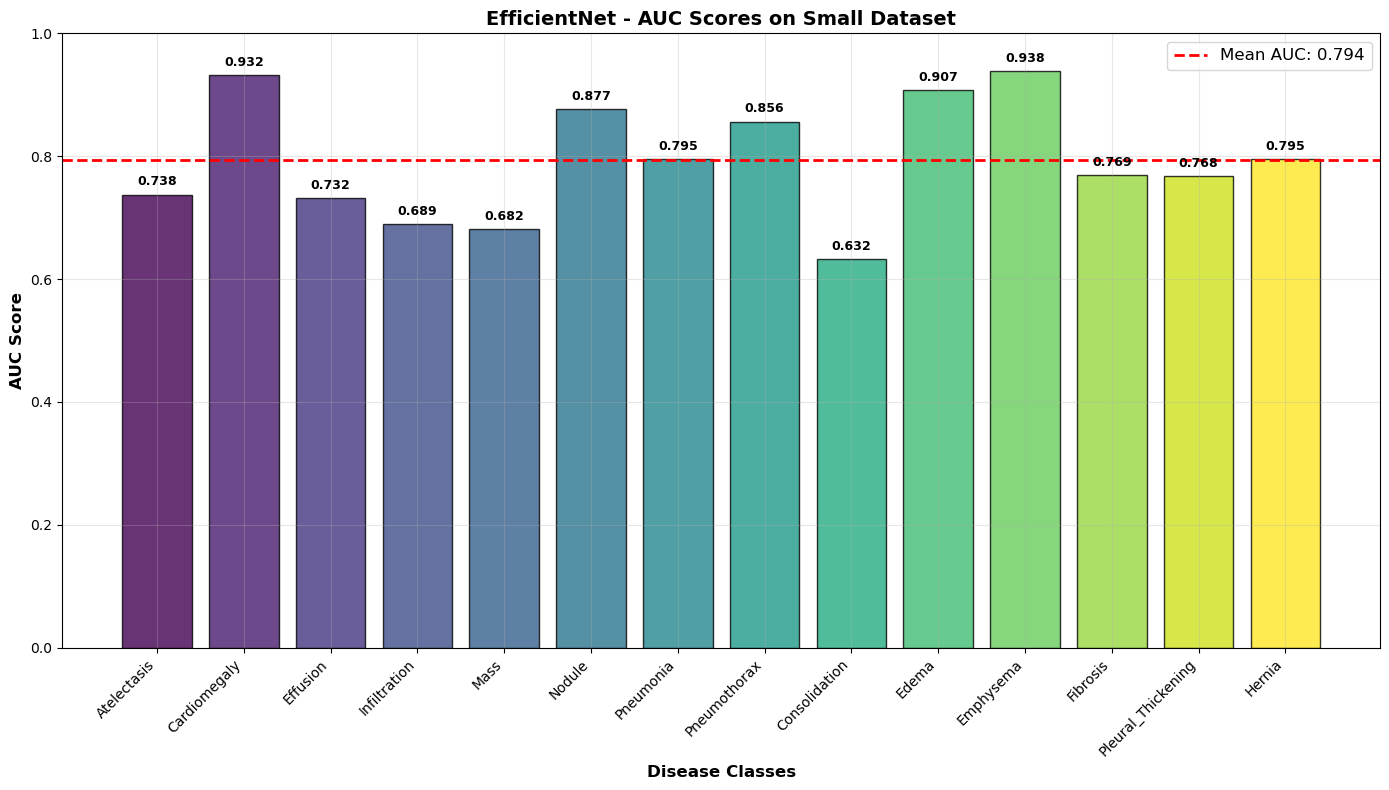


 TESTING VISION TRANSFORMER


/tmp/ipykernel_234509/1277439268.py:549: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(SmallDatasetConfig.vit_checkpoint, map_location=SmallDatasetCo

 Vision Transformer weights loaded successfully
Testing Vision Transformer on small dataset...


Testing Vision Transformer: 100%|██████████| 18/18 [00:01<00:00, 11.13it/s]



VISION TRANSFORMER - COMPREHENSIVE TEST RESULTS

AUC Scores per class:
---------------------------------------------
Atelectasis         : 0.7429
Cardiomegaly        : 0.9635
Effusion            : 0.7098
Infiltration        : 0.6481
Mass                : 0.5796
Nodule              : 0.7040
Pneumonia           : 0.7511
Pneumothorax        : 0.7666
Consolidation       : 0.6683
Edema               : 0.8619
Emphysema           : 0.7477
Fibrosis            : 0.8513
Pleural_Thickening  : 0.6289
Hernia              : 0.9415

 Mean AUC: 0.7547

Detailed Classification Metrics:
-------------------------------------------------------
Atelectasis         : Precision: 0.8000, Recall: 0.1538, F1: 0.2581
Cardiomegaly        : Precision: 0.5000, Recall: 0.0833, F1: 0.1429
Effusion            : Precision: 0.6000, Recall: 0.1071, F1: 0.1818
Infiltration        : Precision: 0.4000, Recall: 0.0426, F1: 0.0769
Mass                : Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Nodule              : Preci

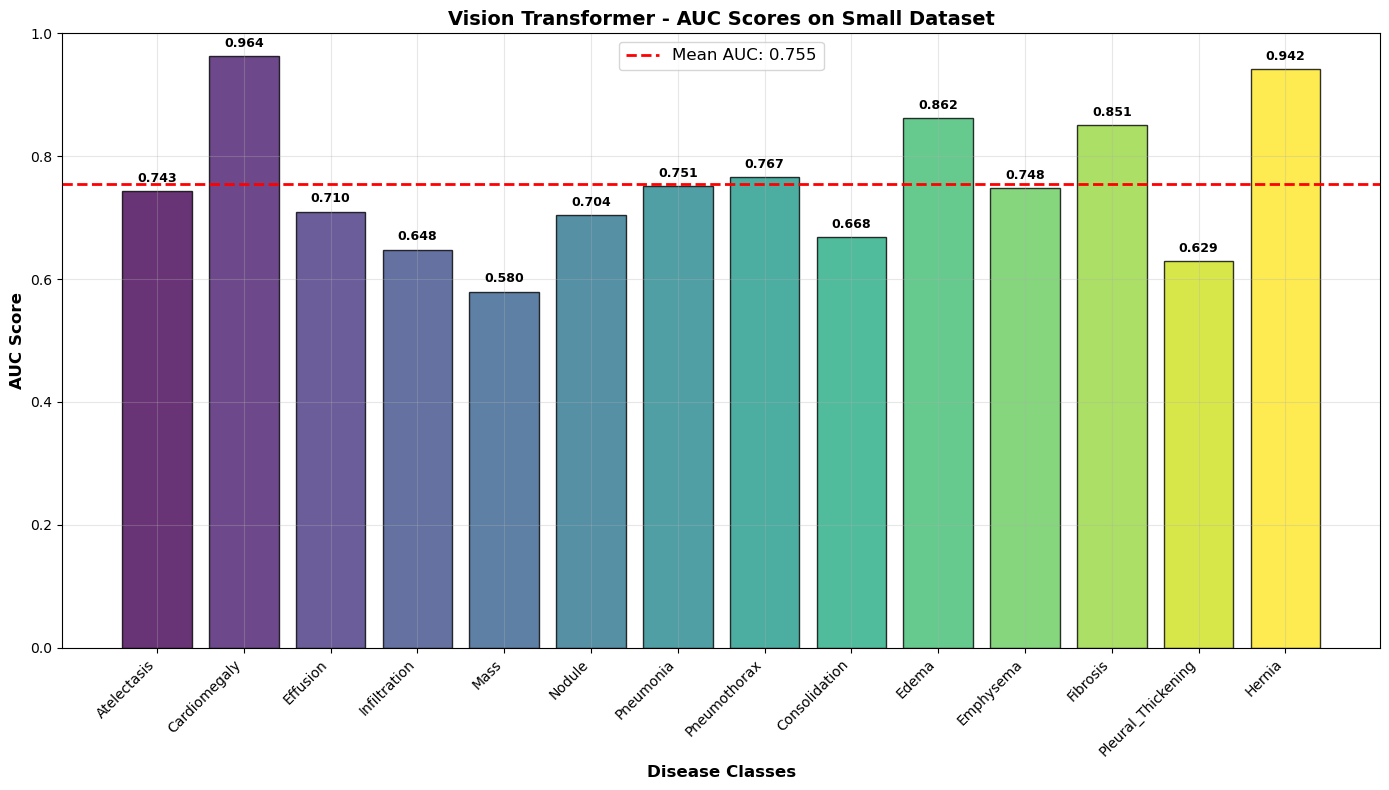


 MODEL COMPARISON


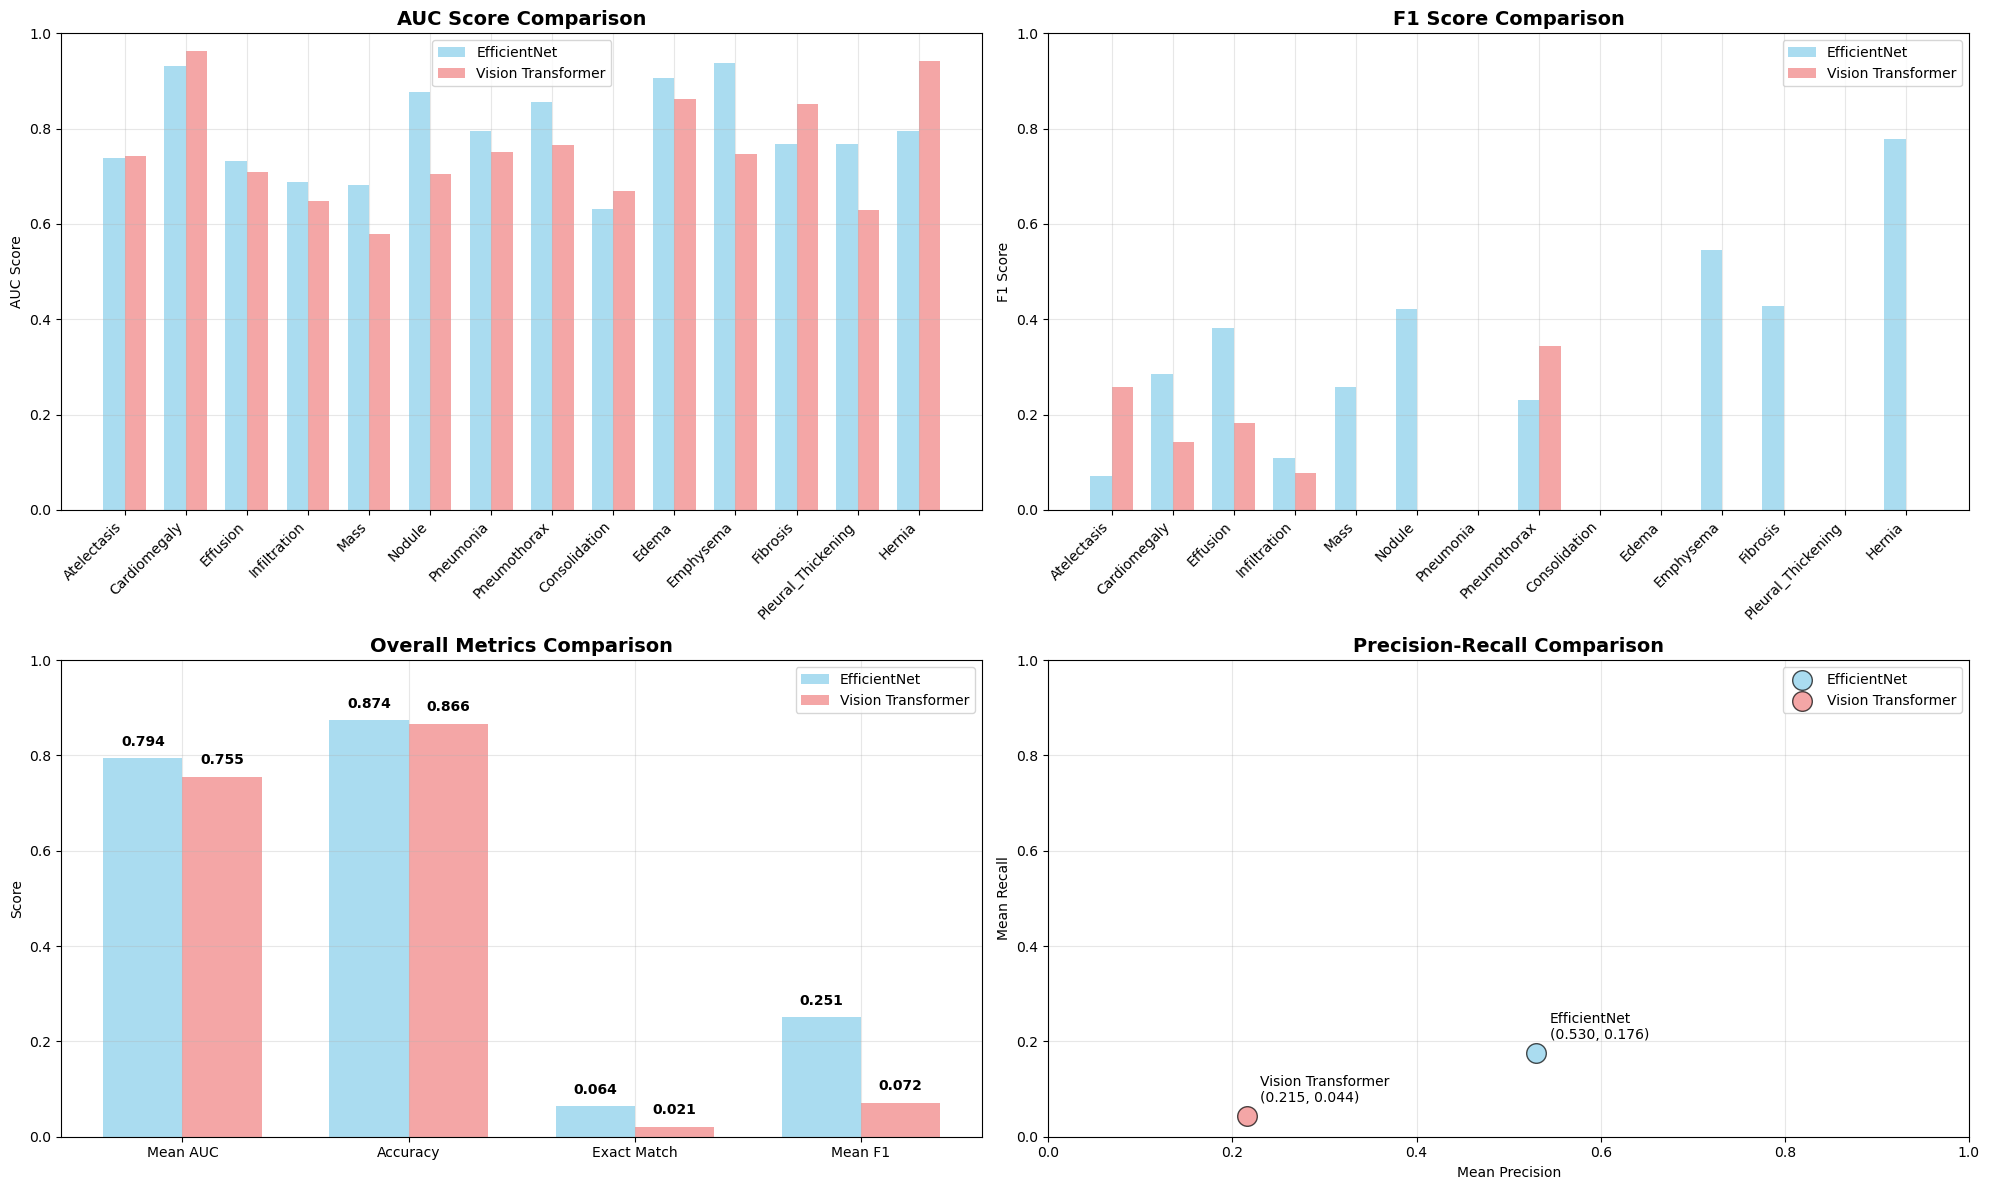


 FINAL COMPARISON SUMMARY:
----------------------------------------
Metric               EfficientNet    Vision Transformer Winner    
------------------------------------------------------------
Mean AUC             0.7936          0.7547          EfficientNet
Accuracy             0.8740          0.8658          EfficientNet
Mean F1              0.2506          0.0717          EfficientNet
Exact Match          0.0643          0.0214          EfficientNet
Mean Precision       0.5298          0.2153          EfficientNet
Mean Recall          0.1762          0.0439          EfficientNet

 Testing completed successfully!
 All results saved in: small_dataset_results


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import json
from datetime import datetime
import timm

# Configuration for Small Dataset Testing
class SmallDatasetConfig:
    data_dir = "/small_data_test" #update this path accordingly
    csv_path = "/small_data_test/small_data_entry_2017.csv" #update this path accordingly
    image_size = 512  # For EfficientNet
    image_size_vit = 224  # For Vision Transformer
    batch_size = 8  # Smaller batch size for small dataset
    num_classes = 14
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Model paths
    efficientnet_checkpoint = "efficient_net/best_model.pth"
    vit_checkpoint = "ViT/best_model.pth"
    
    # Output directories
    results_dir = "small_dataset_results"
    efficientnet_dir = "small_dataset_results/efficientnet"
    vit_dir = "small_dataset_results/vit"
    comparisons_dir = "small_dataset_results/comparisons"

# Create output directories
os.makedirs(SmallDatasetConfig.efficientnet_dir, exist_ok=True)
os.makedirs(SmallDatasetConfig.vit_dir, exist_ok=True)
os.makedirs(SmallDatasetConfig.comparisons_dir, exist_ok=True)

# Dataset class for small dataset
class SmallChestXrayDataset(Dataset):
    def __init__(self, csv_file, base_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.base_dir = base_dir
        self.transform = transform
        
        self.disease_classes = [
            'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 
            'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax', 
            'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 
            'Pleural_Thickening', 'Hernia'
        ]
        
        self._create_label_columns()
        print(f"Small dataset initialized with {len(self.df)} images")
        
    def _create_label_columns(self):
        for disease in self.disease_classes:
            self.df.loc[:, disease] = self.df['Finding Labels'].apply(
                lambda x: 1 if disease in x else 0
            )
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['Image Index']
        img_path = os.path.join(self.base_dir, "images", img_name)
        
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Warning: Could not load image {img_path}: {e}")
            # Create a black image as fallback
            image = Image.new('RGB', (SmallDatasetConfig.image_size, SmallDatasetConfig.image_size), color='black')
        
        labels = []
        for disease in self.disease_classes:
            labels.append(self.df.iloc[idx][disease])
        
        if self.transform:
            image = self.transform(image)
            
        return image, torch.FloatTensor(labels), img_name
    
    def get_class_distribution(self):
        distribution = {}
        for disease in self.disease_classes:
            count = self.df[disease].sum()
            percentage = (count / len(self.df)) * 100
            distribution[disease] = {'count': count, 'percentage': percentage}
        return distribution

# EfficientNet Model (same as your training)
class EfficientNetModel(nn.Module):
    def __init__(self, num_classes=14, model_name="tf_efficientnet_b3"):
        super(EfficientNetModel, self).__init__()
        
        self.backbone = timm.create_model(
            model_name, 
            pretrained=False,
            num_classes=0
        )
        
        if "b3" in model_name:
            self.feature_dim = 1536
        else:
            self.feature_dim = self.backbone.num_features
        
        self.classifier = nn.Linear(self.feature_dim, num_classes)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        features = self.backbone(x)
        output = self.classifier(features)
        output = self.sigmoid(output)
        return output

# Vision Transformer Model (same as your training)
class VisionTransformerModel(nn.Module):
    def __init__(self, num_classes=14, model_name="vit_base_patch16_224"):
        super(VisionTransformerModel, self).__init__()
        
        self.backbone = timm.create_model(
            model_name, 
            pretrained=False,
            num_classes=0
        )
        
        if "base" in model_name:
            self.feature_dim = 768
        elif "large" in model_name:
            self.feature_dim = 1024
        else:
            self.feature_dim = self.backbone.num_features
        
        self.classifier = nn.Linear(self.feature_dim, num_classes)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        features = self.backbone(x)
        features = self.dropout(features)
        output = self.classifier(features)
        output = self.sigmoid(output)
        return output

# Test function for any model
def test_model(model, test_loader, model_name, device):
    """Comprehensive testing for any model"""
    model.eval()
    all_predictions = []
    all_labels = []
    all_probabilities = []
    all_image_names = []
    
    print(f"Testing {model_name} on small dataset...")
    
    with torch.no_grad():
        for images, labels, img_names in tqdm(test_loader, desc=f"Testing {model_name}"):
            images = images.to(device)
            
            outputs = model(images)
            probabilities = outputs.cpu().numpy()
            predictions = (probabilities > 0.5).astype(int)
            
            all_probabilities.append(probabilities)
            all_predictions.append(predictions)
            all_labels.append(labels.numpy())
            all_image_names.extend(img_names)
    
    # Concatenate all batches
    all_probabilities = np.concatenate(all_probabilities)
    all_predictions = np.concatenate(all_predictions)
    all_labels = np.concatenate(all_labels)
    
    return all_probabilities, all_predictions, all_labels, all_image_names

# Calculate comprehensive metrics
def calculate_comprehensive_metrics(probabilities, predictions, labels, disease_classes, model_name):
    """Calculate comprehensive evaluation metrics"""
    print(f"\n" + "="*70)
    print(f"{model_name.upper()} - COMPREHENSIVE TEST RESULTS")
    print("="*70)
    
    metrics = {}
    
    # Calculate AUC for each class
    auc_scores = []
    print("\nAUC Scores per class:")
    print("-" * 45)
    
    for i, disease in enumerate(disease_classes):
        try:
            if np.sum(labels[:, i]) > 0:
                auc = roc_auc_score(labels[:, i], probabilities[:, i])
                auc_scores.append(auc)
                print(f"{disease:<20}: {auc:.4f}")
            else:
                auc_scores.append(0.0)
                print(f"{disease:<20}: No positive samples")
        except Exception as e:
            auc_scores.append(0.0)
            print(f"{disease:<20}: Error calculating AUC")
    
    metrics['auc_scores'] = auc_scores
    valid_auc_scores = [auc for auc in auc_scores if auc > 0]
    metrics['mean_auc'] = np.mean(valid_auc_scores) if valid_auc_scores else 0.0
    
    print(f"\n Mean AUC: {metrics['mean_auc']:.4f}")
    
    # Calculate precision, recall, f1-score for each class
    print("\nDetailed Classification Metrics:")
    print("-" * 55)
    
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i, disease in enumerate(disease_classes):
        if np.sum(labels[:, i]) > 0:
            precision, recall, f1, _ = precision_recall_fscore_support(
                labels[:, i], predictions[:, i], average='binary', zero_division=0
            )
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            print(f"{disease:<20}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
        else:
            precision_scores.append(0.0)
            recall_scores.append(0.0)
            f1_scores.append(0.0)
    
    metrics['precision_scores'] = precision_scores
    metrics['recall_scores'] = recall_scores
    metrics['f1_scores'] = f1_scores
    metrics['mean_precision'] = np.mean(precision_scores)
    metrics['mean_recall'] = np.mean(recall_scores)
    metrics['mean_f1'] = np.mean(f1_scores)
    
    # Overall metrics
    print("\n Overall Metrics:")
    print("-" * 25)
    
    # Accuracy
    accuracy = np.mean(predictions == labels)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Sample-based metrics
    sample_accuracy = np.mean(np.all(predictions == labels, axis=1))
    print(f"Exact Match Ratio: {sample_accuracy:.4f}")
    
    # Hamming metrics
    hamming_loss = np.mean(predictions != labels)
    hamming_accuracy = 1 - hamming_loss
    print(f"Hamming Accuracy: {hamming_accuracy:.4f}")
    print(f"Hamming Loss: {hamming_loss:.4f}")
    
    metrics['accuracy'] = accuracy
    metrics['sample_accuracy'] = sample_accuracy
    metrics['hamming_accuracy'] = hamming_accuracy
    metrics['hamming_loss'] = hamming_loss
    
    return metrics

# Visualization functions
def plot_auc_comparison(auc_scores, disease_classes, model_name, save_path):
    """Plot AUC scores for a single model"""
    plt.figure(figsize=(14, 8))
    
    # Create color gradient based on AUC scores
    colors = plt.cm.viridis(np.linspace(0, 1, len(auc_scores)))
    
    bars = plt.bar(range(len(auc_scores)), auc_scores, color=colors, alpha=0.8, edgecolor='black')
    mean_auc = np.mean([auc for auc in auc_scores if auc > 0])
    plt.axhline(y=mean_auc, color='red', linestyle='--', linewidth=2, 
                label=f'Mean AUC: {mean_auc:.3f}')
    
    plt.xlabel('Disease Classes', fontsize=12, fontweight='bold')
    plt.ylabel('AUC Score', fontsize=12, fontweight='bold')
    plt.title(f'{model_name} - AUC Scores on Small Dataset', fontsize=14, fontweight='bold')
    plt.xticks(range(len(auc_scores)), disease_classes, rotation=45, ha='right')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.0)
    
    # Add value labels on bars
    for bar, auc in zip(bars, auc_scores):
        if auc > 0:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{auc:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_model_comparison(efficientnet_metrics, vit_metrics, disease_classes, save_path):
    """Compare EfficientNet and Vision Transformer performance"""
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    # Plot 1: AUC Comparison
    x = np.arange(len(disease_classes))
    width = 0.35
    
    bars1 = axes[0, 0].bar(x - width/2, efficientnet_metrics['auc_scores'], width, 
                          label='EfficientNet', alpha=0.7, color='skyblue')
    bars2 = axes[0, 0].bar(x + width/2, vit_metrics['auc_scores'], width, 
                          label='Vision Transformer', alpha=0.7, color='lightcoral')
    
    axes[0, 0].set_title('AUC Score Comparison', fontsize=14, fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(disease_classes, rotation=45, ha='right')
    axes[0, 0].set_ylabel('AUC Score')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, 1.0)
    
    # Plot 2: F1 Score Comparison
    bars1 = axes[0, 1].bar(x - width/2, efficientnet_metrics['f1_scores'], width, 
                          label='EfficientNet', alpha=0.7, color='skyblue')
    bars2 = axes[0, 1].bar(x + width/2, vit_metrics['f1_scores'], width, 
                          label='Vision Transformer', alpha=0.7, color='lightcoral')
    
    axes[0, 1].set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(disease_classes, rotation=45, ha='right')
    axes[0, 1].set_ylabel('F1 Score')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, 1.0)
    
    # Plot 3: Overall Metrics Comparison
    overall_metrics = ['Mean AUC', 'Accuracy', 'Exact Match', 'Mean F1']
    efficientnet_values = [
        efficientnet_metrics['mean_auc'],
        efficientnet_metrics['accuracy'],
        efficientnet_metrics['sample_accuracy'],
        efficientnet_metrics['mean_f1']
    ]
    vit_values = [
        vit_metrics['mean_auc'],
        vit_metrics['accuracy'],
        vit_metrics['sample_accuracy'],
        vit_metrics['mean_f1']
    ]
    
    x_overall = np.arange(len(overall_metrics))
    bars1 = axes[1, 0].bar(x_overall - width/2, efficientnet_values, width, 
                          label='EfficientNet', alpha=0.7, color='skyblue')
    bars2 = axes[1, 0].bar(x_overall + width/2, vit_values, width, 
                          label='Vision Transformer', alpha=0.7, color='lightcoral')
    
    axes[1, 0].set_title('Overall Metrics Comparison', fontsize=14, fontweight='bold')
    axes[1, 0].set_xticks(x_overall)
    axes[1, 0].set_xticklabels(overall_metrics)
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim(0, 1.0)
    
    # Add value labels for overall metrics
    for i, v in enumerate(efficientnet_values):
        axes[1, 0].text(i - width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    for i, v in enumerate(vit_values):
        axes[1, 0].text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Plot 4: Precision-Recall Comparison
    axes[1, 1].scatter(efficientnet_metrics['mean_precision'], efficientnet_metrics['mean_recall'], 
                      s=200, color='skyblue', alpha=0.7, label='EfficientNet', edgecolors='black')
    axes[1, 1].scatter(vit_metrics['mean_precision'], vit_metrics['mean_recall'], 
                      s=200, color='lightcoral', alpha=0.7, label='Vision Transformer', edgecolors='black')
    
    axes[1, 1].set_title('Precision-Recall Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Mean Precision')
    axes[1, 1].set_ylabel('Mean Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xlim(0, 1.0)
    axes[1, 1].set_ylim(0, 1.0)
    
    # Add annotations
    axes[1, 1].annotate(f'EfficientNet\n({efficientnet_metrics["mean_precision"]:.3f}, {efficientnet_metrics["mean_recall"]:.3f})',
                       (efficientnet_metrics['mean_precision'], efficientnet_metrics['mean_recall']),
                       textcoords="offset points", xytext=(10,10), ha='left')
    axes[1, 1].annotate(f'Vision Transformer\n({vit_metrics["mean_precision"]:.3f}, {vit_metrics["mean_recall"]:.3f})',
                       (vit_metrics['mean_precision'], vit_metrics['mean_recall']),
                       textcoords="offset points", xytext=(10,10), ha='left')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Save results function
def save_model_results(metrics, probabilities, predictions, labels, image_names, disease_classes, model_name, output_dir):
    """Save detailed results for a model"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save metrics to JSON
    results = {
        'timestamp': timestamp,
        'model': model_name,
        'dataset': 'small_test_140_images',
        'metrics': metrics,
        'class_names': disease_classes,
        'dataset_size': len(labels)
    }
    
    with open(os.path.join(output_dir, f'{model_name}_metrics.json'), 'w') as f:
        json.dump(results, f, indent=4)
    
    # Save per-class metrics to CSV
    class_metrics_df = pd.DataFrame({
        'Disease': disease_classes,
        'AUC': metrics['auc_scores'],
        'Precision': metrics['precision_scores'],
        'Recall': metrics['recall_scores'],
        'F1_Score': metrics['f1_scores'],
        'Support': np.sum(labels, axis=0)
    })
    class_metrics_df.to_csv(os.path.join(output_dir, f'{model_name}_per_class_metrics.csv'), index=False)
    
    # Save predictions to CSV
    results_df = pd.DataFrame({
        'image_name': image_names,
        'true_labels': [str(row) for row in labels],
        'predictions': [str(row) for row in predictions],
        'probabilities': [str(row) for row in probabilities]
    })
    results_df.to_csv(os.path.join(output_dir, f'{model_name}_predictions.csv'), index=False)
    
    print(f" {model_name} results saved to: {output_dir}")

# Main testing function
def test_both_models_on_small_dataset():
    """Main function to test both models on small dataset"""
    print(" COMPREHENSIVE MODEL TESTING ON SMALL DATASET")
    print("=" * 60)
    print(f"Dataset: {SmallDatasetConfig.data_dir}")
    print(f"Total images: ~140")
    print(f"Device: {SmallDatasetConfig.device}")
    print("=" * 60)
    
    # Load small dataset
    print("\n Loading small dataset...")
    dataset_info = pd.read_csv(SmallDatasetConfig.csv_path)
    print(f"Small dataset contains {len(dataset_info)} images")
    
    # Create transforms for both models
    efficientnet_transform = transforms.Compose([
        transforms.Resize((SmallDatasetConfig.image_size, SmallDatasetConfig.image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    vit_transform = transforms.Compose([
        transforms.Resize((SmallDatasetConfig.image_size_vit, SmallDatasetConfig.image_size_vit)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    # Create datasets
    efficientnet_dataset = SmallChestXrayDataset(
        csv_file=SmallDatasetConfig.csv_path,
        base_dir=SmallDatasetConfig.data_dir,
        transform=efficientnet_transform
    )
    
    vit_dataset = SmallChestXrayDataset(
        csv_file=SmallDatasetConfig.csv_path,
        base_dir=SmallDatasetConfig.data_dir,
        transform=vit_transform
    )
    
    # Create data loaders
    efficientnet_loader = DataLoader(
        efficientnet_dataset, 
        batch_size=SmallDatasetConfig.batch_size, 
        shuffle=False, 
        num_workers=2
    )
    
    vit_loader = DataLoader(
        vit_dataset, 
        batch_size=SmallDatasetConfig.batch_size, 
        shuffle=False, 
        num_workers=2
    )
    
    disease_classes = efficientnet_dataset.disease_classes
    
    # Test EfficientNet
    print("\n" + "="*50)
    print(" TESTING EFFICIENTNET")
    print("="*50)
    
    efficientnet_model = EfficientNetModel(
        num_classes=SmallDatasetConfig.num_classes, 
        model_name="tf_efficientnet_b3"
    )
    efficientnet_model = efficientnet_model.to(SmallDatasetConfig.device)
    
    # Load EfficientNet weights
    if os.path.exists(SmallDatasetConfig.efficientnet_checkpoint):
        checkpoint = torch.load(SmallDatasetConfig.efficientnet_checkpoint, map_location=SmallDatasetConfig.device)
        efficientnet_model.load_state_dict(checkpoint['model_state_dict'])
        print(" EfficientNet weights loaded successfully")
    else:
        print(" EfficientNet checkpoint not found, testing with random weights")
    
    # Test EfficientNet
    eff_probabilities, eff_predictions, eff_labels, eff_image_names = test_model(
        efficientnet_model, efficientnet_loader, "EfficientNet", SmallDatasetConfig.device
    )
    
    efficientnet_metrics = calculate_comprehensive_metrics(
        eff_probabilities, eff_predictions, eff_labels, disease_classes, "EfficientNet"
    )
    
    # Save EfficientNet results
    save_model_results(
        efficientnet_metrics, eff_probabilities, eff_predictions, eff_labels, 
        eff_image_names, disease_classes, "efficientnet", SmallDatasetConfig.efficientnet_dir
    )
    
    # Plot EfficientNet results
    plot_auc_comparison(
        efficientnet_metrics['auc_scores'], disease_classes, "EfficientNet",
        os.path.join(SmallDatasetConfig.efficientnet_dir, "efficientnet_auc_scores.png")
    )
    
    # Test Vision Transformer
    print("\n" + "="*50)
    print(" TESTING VISION TRANSFORMER")
    print("="*50)
    
    vit_model = VisionTransformerModel(
        num_classes=SmallDatasetConfig.num_classes, 
        model_name="vit_base_patch16_224"
    )
    vit_model = vit_model.to(SmallDatasetConfig.device)
    
    # Load Vision Transformer weights
    if os.path.exists(SmallDatasetConfig.vit_checkpoint):
        checkpoint = torch.load(SmallDatasetConfig.vit_checkpoint, map_location=SmallDatasetConfig.device)
        vit_model.load_state_dict(checkpoint['model_state_dict'])
        print(" Vision Transformer weights loaded successfully")
    else:
        print(" Vision Transformer checkpoint not found, testing with random weights")
    
    # Test Vision Transformer
    vit_probabilities, vit_predictions, vit_labels, vit_image_names = test_model(
        vit_model, vit_loader, "Vision Transformer", SmallDatasetConfig.device
    )
    
    vit_metrics = calculate_comprehensive_metrics(
        vit_probabilities, vit_predictions, vit_labels, disease_classes, "Vision Transformer"
    )
    
    # Save Vision Transformer results
    save_model_results(
        vit_metrics, vit_probabilities, vit_predictions, vit_labels, 
        vit_image_names, disease_classes, "vision_transformer", SmallDatasetConfig.vit_dir
    )
    
    # Plot Vision Transformer results
    plot_auc_comparison(
        vit_metrics['auc_scores'], disease_classes, "Vision Transformer",
        os.path.join(SmallDatasetConfig.vit_dir, "vision_transformer_auc_scores.png")
    )
    
    # Compare both models
    print("\n" + "="*50)
    print(" MODEL COMPARISON")
    print("="*50)
    
    plot_model_comparison(
        efficientnet_metrics, vit_metrics, disease_classes,
        os.path.join(SmallDatasetConfig.comparisons_dir, "model_comparison.png")
    )
    
    # Print final comparison
    print("\n FINAL COMPARISON SUMMARY:")
    print("-" * 40)
    print(f"{'Metric':<20} {'EfficientNet':<15} {'Vision Transformer':<15} {'Winner':<10}")
    print("-" * 60)
    
    comparisons = [
        ('Mean AUC', efficientnet_metrics['mean_auc'], vit_metrics['mean_auc']),
        ('Accuracy', efficientnet_metrics['accuracy'], vit_metrics['accuracy']),
        ('Mean F1', efficientnet_metrics['mean_f1'], vit_metrics['mean_f1']),
        ('Exact Match', efficientnet_metrics['sample_accuracy'], vit_metrics['sample_accuracy']),
        ('Mean Precision', efficientnet_metrics['mean_precision'], vit_metrics['mean_precision']),
        ('Mean Recall', efficientnet_metrics['mean_recall'], vit_metrics['mean_recall']),
    ]
    
    for metric_name, eff_value, vit_value in comparisons:
        winner = "EfficientNet" if eff_value > vit_value else "Vision Transformer" if vit_value > eff_value else "Tie"
        print(f"{metric_name:<20} {eff_value:<15.4f} {vit_value:<15.4f} {winner:<10}")
    
    print("\n Testing completed successfully!")
    print(f" All results saved in: {SmallDatasetConfig.results_dir}")
    
    return efficientnet_metrics, vit_metrics

if __name__ == "__main__":
    # Run comprehensive testing
    eff_metrics, vit_metrics = test_both_models_on_small_dataset()